# Lecture 9: Sampling in R

```{note}
In this lecture, we will review sampling methods in R using Indian Time Use Data.
```

In [69]:
# 2024 ITUS Individual Data
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/2024-ITUS%20IndividualData.csv"
data <- read.csv(url)

In [70]:
# Population Age Data
P <- data$age

In [23]:
library(ggplot2)

# Diagnostics
# P : Popultation
# SM: Sampling Method
# m : number of samples
# n : size of each sample
diagnostics <- function(P, SM, m , n) {
  # population parameter  
  z <- mean(P)
  
  # sample parameters
  Z <- vector("numeric", m)
  for (i in 1:m) {
    S    <- SM(P, n, seed=i)
    Z[i] <- mean(S)
  }

  # bias
  b <- mean(Z) - z
  message("Bias: ", round(b, 3))

  # error
  E <- Z - (z + b)

  # standard error
  se <- sqrt(mean(E^2))
  message("SE: ", round(se, 3))

  # root mean squared error
  rmse <- sqrt(b^2 + se^2)
  message("RMSE: ", round(rmse, 3))

  # plot sample parameters and population parameter
  df <- data.frame(Sample = 1:m, SampleMean = Z)
  options(repr.plot.width = 12, repr.plot.height = 8)
  ggplot(df, aes(x = Sample, y = SampleMean)) +
  geom_point(color = "steelblue", size = 3) +
  geom_hline(yintercept = z, color = "red", linetype = "dashed", linewidth = 1.2) +
  labs(title = "Sample Means vs Population Mean",
       subtitle = "Each point is the mean age from the sample",
       y = "Sample Mean",
       x = "Sample Number") +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )
}

## Random Sampling

Under random sampling, every unit in the population has an equal chance of being selected. This is the most basic form of probability sampling and provides unbiased estimates if implemented correctly.

Bias: -0.006

SE: 0.607

RMSE: 0.607



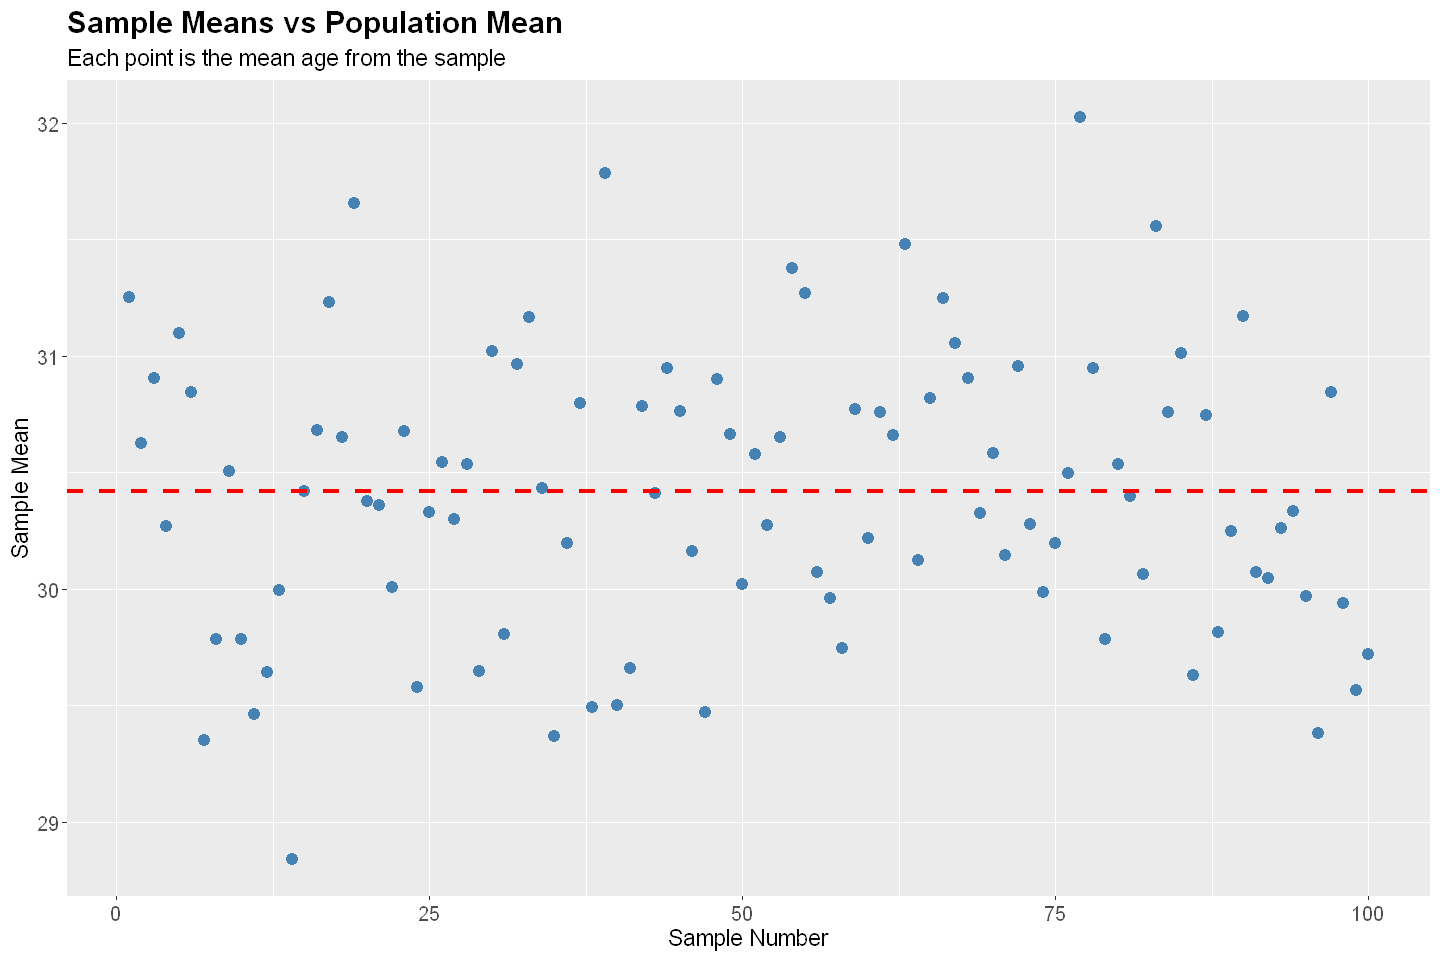

In [24]:
# Random Sampling
# P   : Population
# n   : sample size
# seed: random number generator seed
RS <- function(P, n, seed) {
  set.seed(seed)

  # get n random indices of P
  I <- order(runif(length(P)))[1:n] # runif(n) renders n random numbers sampled from U[0,1] | order(V) renders indices of the sorted V

  # fetch sample
  S <- P[I]

  # return random sample
  return(S)
}

# Sampling Diagnostics
diagnostics(P, RS, 100, 1000)

## Convineince Sampling

Convenience sampling is a non-probability sampling technique where the sample is drawn from a group that is readily available and easy to contact. 

Bias: -0.138

SE: 3.408

RMSE: 3.411



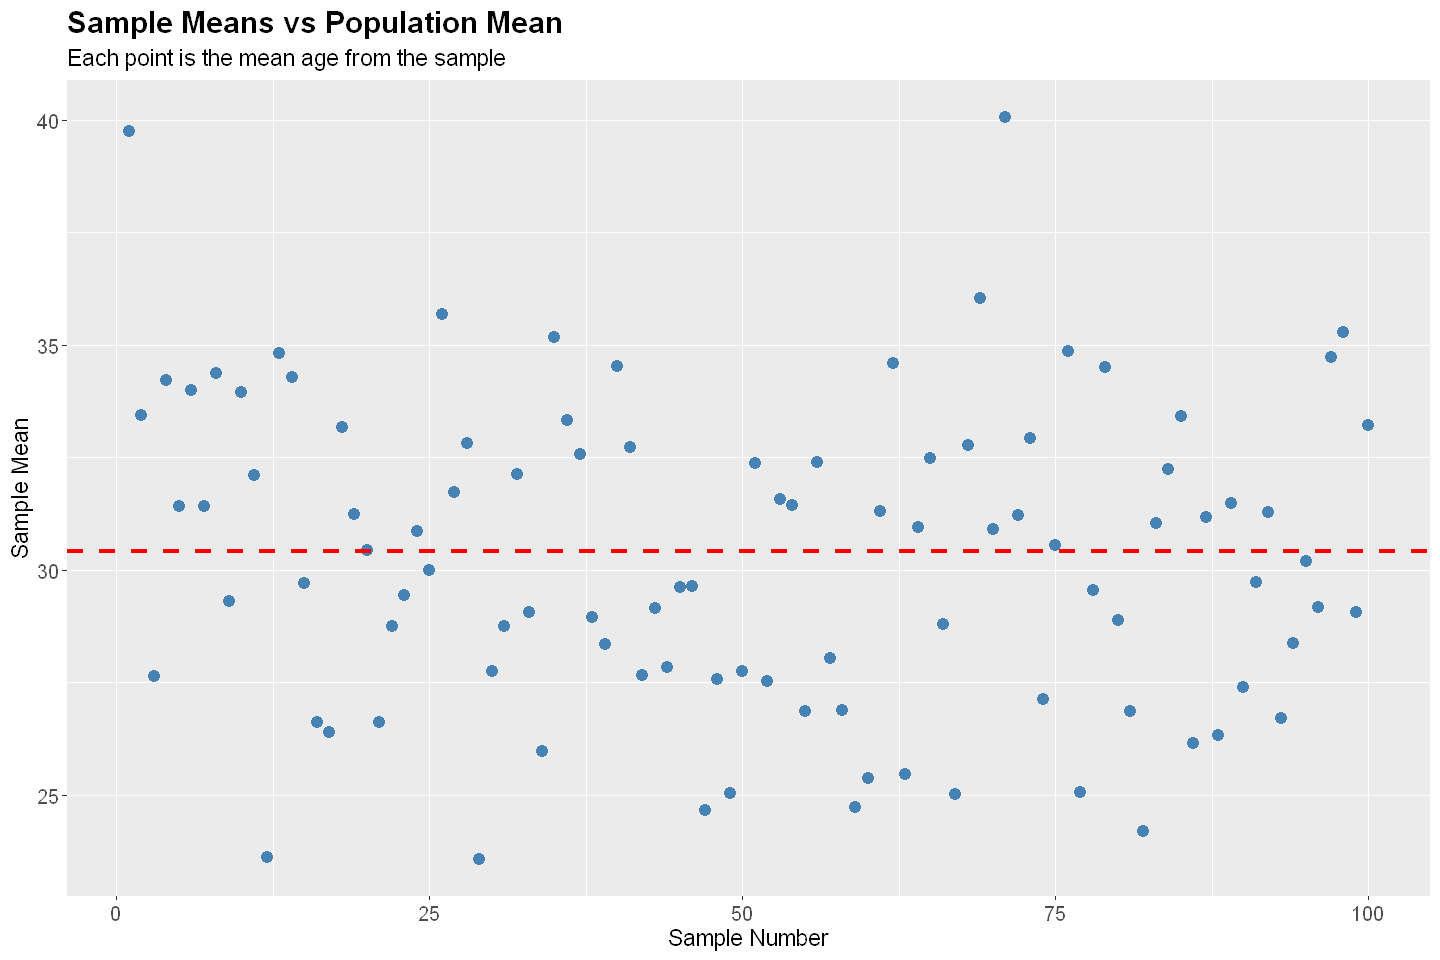

In [28]:
# Convineince Sampling
# P   : Population
# n   : sample size
# seed: random number generator seed
CS <- function(P, n, seed) {
  set.seed(seed)

  # first n indices from a random index
  l <- length(P)
  k <- l - n + 1
  i <- sample(1:k, 1)
  I <- i:(i + n - 1)

  # fetch sample
  S <- P[I]

  # return random sample
  return(S)
}

# Sampling Diagnostics
diagnostics(P, CS, 100, 1000)

## Systematic Sampling

In systematic sampling, the first unit is selected at random from an ordered list, and subsequent units are selected at fixed intervals (e.g., every k-th unit).

Bias: -0.019

SE: 0.604

RMSE: 0.604



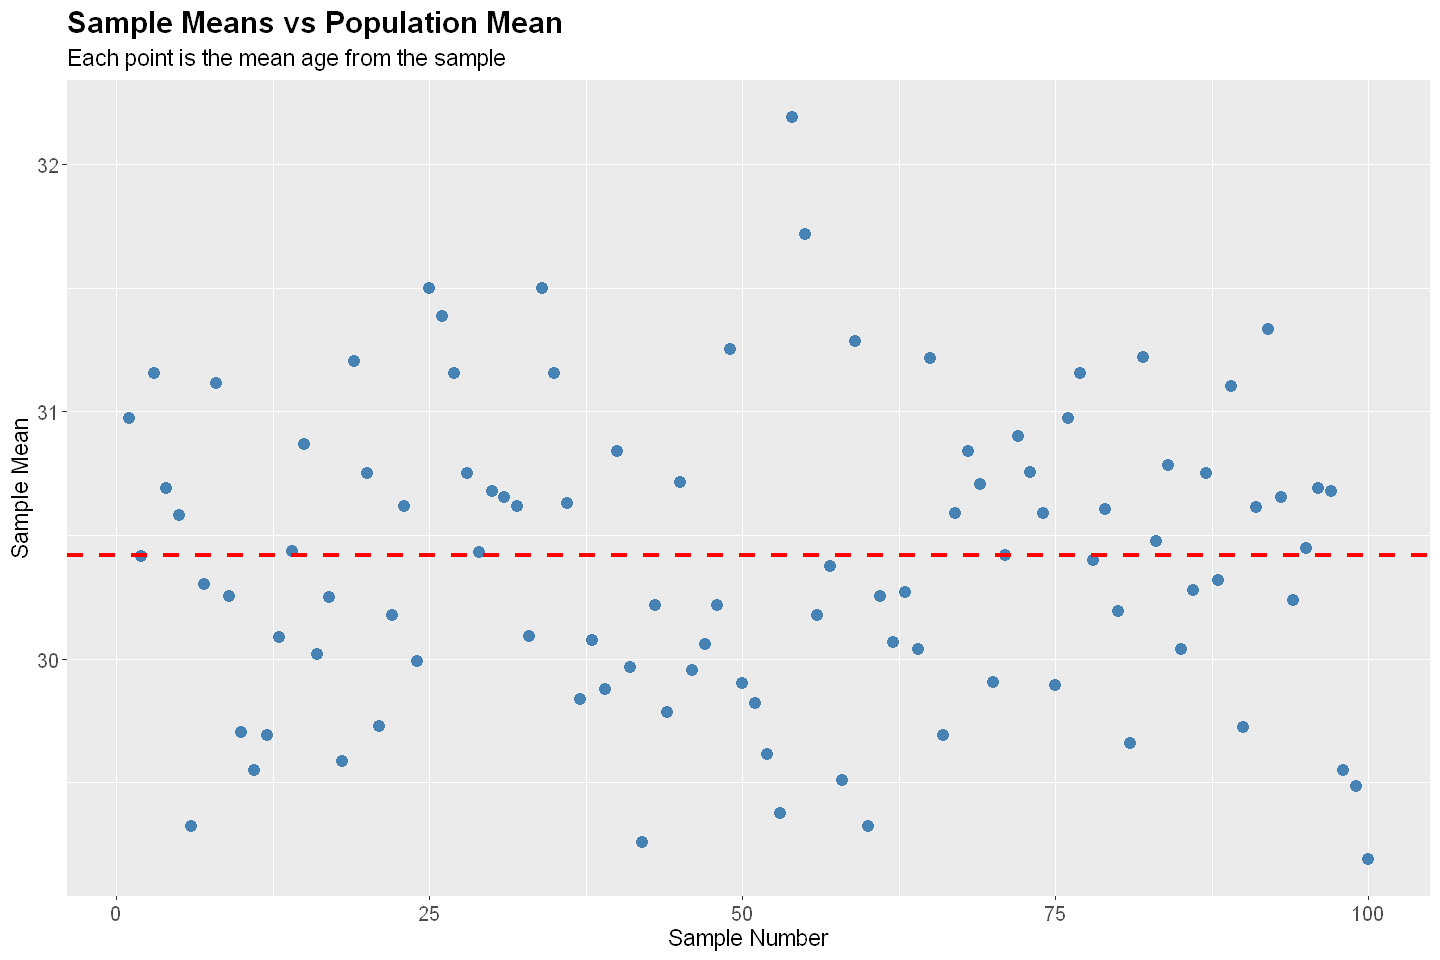

In [48]:
# Systematic Sampling
# P   : Population
# n   : sample size
# seed: random number generator seed
SS <- function(P, n, seed) {
  set.seed(seed)

  # every kth index from a random index
  l <- length(P)
  k <- floor(l / n)
  i <- sample(1:k, 1)
  I <- seq(i, by=k, length.out=n)

  # fetch sample
  S <- P[I]

  # return random sample
  return(S)
}

# Sampling Diagnostics
diagnostics(P, SS, 100, 1000)

## Quota Sampling

Quota sampling is a non-probability sampling method where the population is segmented into mutually exclusive subgroups, and the researcher selects individuals non-randomly until pre-set quotas for each group are filled.

Bias: -0.023

SE: 0.147

RMSE: 0.149



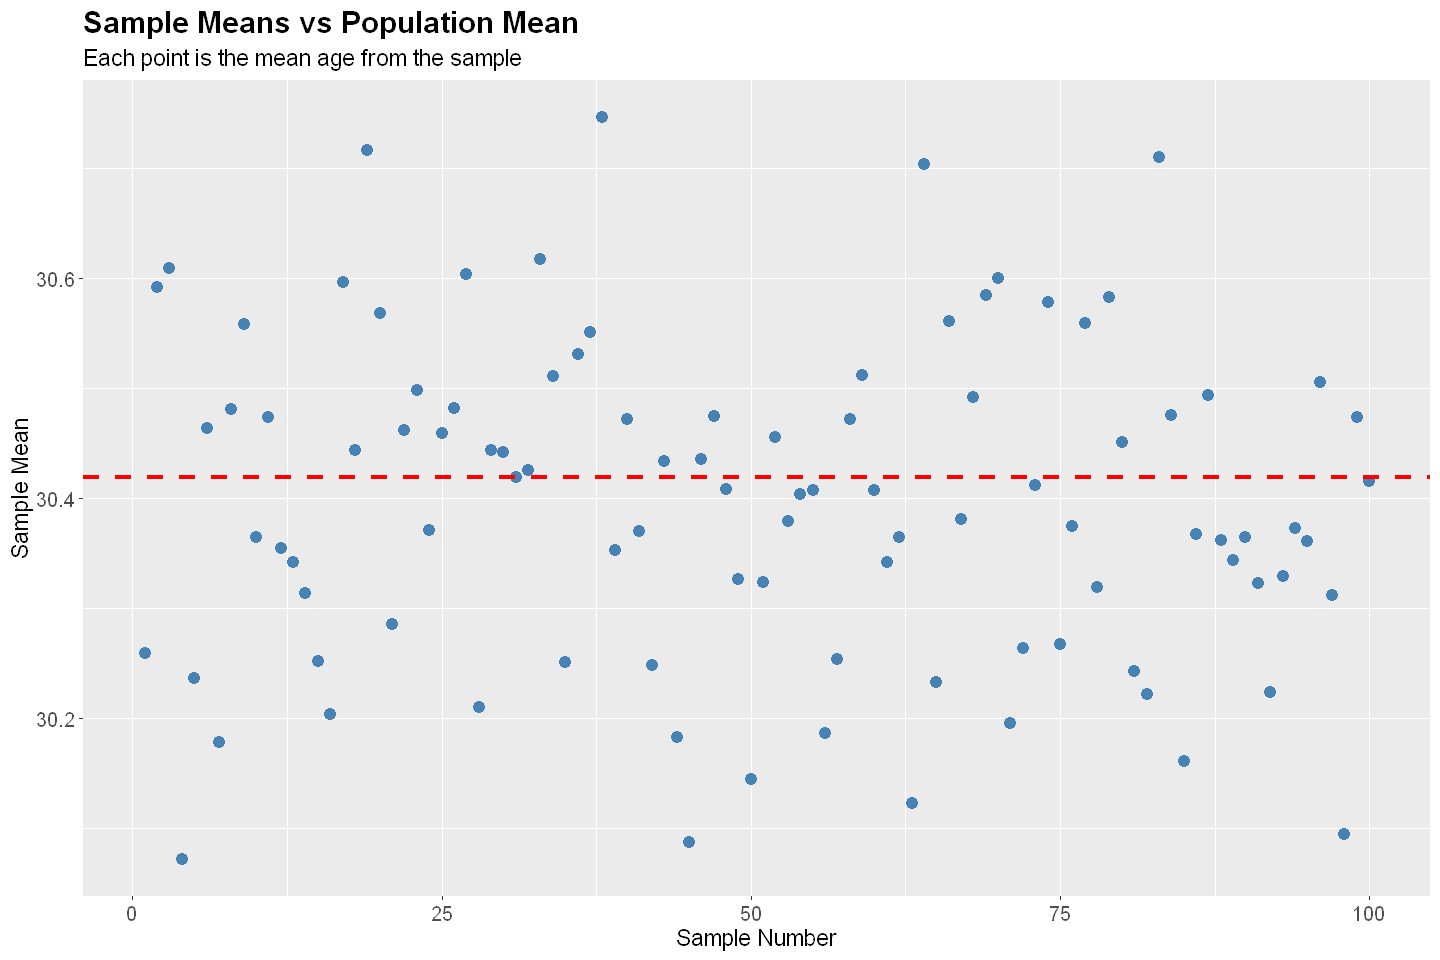

In [ ]:
# Quota Sampling
# P   : Population
# n   : sample size
# seed: random number generator seed
QS <- function(P, n, seed) {
  set.seed(seed)

  # Age Groups
  G <- c("Gen Alpha", "Gen Z", "Millennials", "Gen X", "Boomers", "Silent")
  B <- c(-Inf, 12, 28, 44, 60, 79, 97)
  Z <- cut(P, B, G, right=TRUE)
  Q <- round(table(Z) / sum(table(Z)) * n)

  # fetch indices
  I <- c()
  for (g in G) {
    J <- which(Z == g)
    I <- c(I, sample(J, Q[g]))
  }

  # fetch sample
  S <- P[I]

  # return random sample
  return(S)
}

# Sampling Diagnostics
diagnostics(P, QS, 100, 1000)

## Stratified Sampling

Stratified sampling involves dividing the population into homogeneous subgroups (strata) based on characteristics such as income level, vehicle ownership, or residential density. Random samples are then drawn independently from each stratum. 

Bias: 0.487

SE: 0.659

RMSE: 0.82



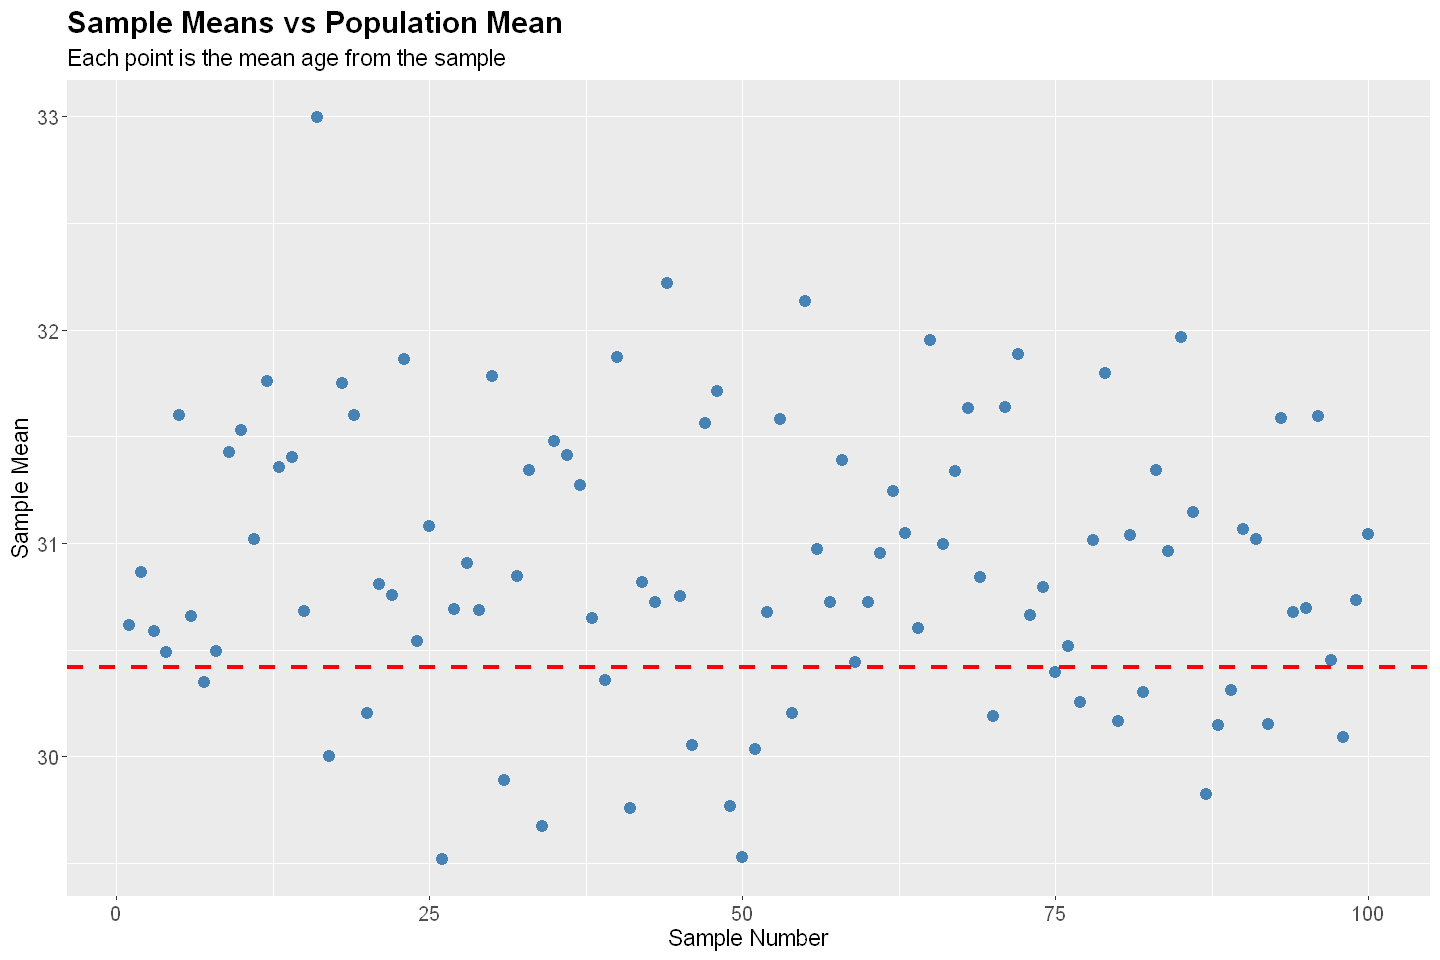

In [88]:
# Stratified Sampling
# P   : Population
# n   : sample size
# seed: random number generator seed
SS <- function(P, n, seed) {
  set.seed(seed)

  # Education Level
  Z <- data$nss_region
  G <- sort(unique(Z))
  k <- length(G)
  Q <- rep(floor(n / k), k)
  d <- n - sum(Q)
  if (d > 0) {
    J <- sample(1:k, d, replace=TRUE)
    for (j in J) {
      Q[j] <- Q[j] + 1
    }
  }

  # fetch indices
  I <- c()
  for (i in 1:k) {
    g <- G[i]
    J <- which(Z == g)
    I <- c(I, sample(J, Q[i]))
  }

  # fetch sample
  S <- P[I]

  # return random sample
  return(S)
}

# Sampling Diagnostics
diagnostics(P, SS, 100, 1000)